In [9]:
import os
import pandas as pd

root_pth = '/home/ddon0001/PhD/experiments/error_sampling_ws_fa_fe/'
all_ds_path = '/home/ddon0001/PhD/experiments/scaled/no_merges_all/solution_edges_datasets_with_FP_WS_FA_FE.csv'
all_ds = pd.read_csv(all_ds_path)[['ds_name', 'solution_incorrect']]
ds_names = all_ds['ds_name'].unique()
plot_order = all_ds[all_ds.solution_incorrect].ds_name.value_counts().index

In [10]:
original_metrics = pd.read_csv(
    '/home/ddon0001/PhD/experiments/as_ctc/no_merges/no_merge_metrics.csv',
    sep=';'
)[['dataset', 'LNK', 'BIO(0)']]
trackastra_metrics = pd.read_csv(
    '/home/ddon0001/PhD/experiments/trackastra/trackastra_metrics.csv',
    sep=';'
)[['dataset', 'LNK', 'BIO(0)']]

In [8]:
all_ds[all_ds.solution_incorrect].ds_name.value_counts()

ds_name
PhC-C2DL-PSC_01        1825
Fluo-N3DH-CE_02         837
Fluo-N3DH-CE_01         630
PhC-C2DL-PSC_02         518
Fluo-N2DL-HeLa_02       384
BF-C2DL-MuSC_02         226
BF-C2DL-MuSC_01         214
Fluo-N2DL-HeLa_01       160
Fluo-N3DH-SIM+_02       148
BF-C2DL-HSC_02          146
Fluo-N2DH-SIM+_02        82
Fluo-N3DH-SIM+_01        81
Fluo-N2DH-SIM+_01        70
Fluo-N3DH-CHO_01         66
Fluo-N2DH-GOWT1_02       51
DIC-C2DH-HeLa_02         49
Fluo-N3DH-CHO_02         37
DIC-C2DH-HeLa_01         34
Fluo-C3DH-H157_02        21
PhC-C2DH-U373_02         18
Fluo-C3DL-MDA231_02      13
BF-C2DL-HSC_01           13
Fluo-C3DL-MDA231_01      12
Fluo-N2DH-GOWT1_01       12
Fluo-C2DL-MSC_02          4
Fluo-C2DL-MSC_01          2
PhC-C2DH-U373_01          2
Name: count, dtype: int64

In [9]:
plot_order

Index(['PhC-C2DL-PSC_01', 'Fluo-N3DH-CE_02', 'Fluo-N3DH-CE_01',
       'PhC-C2DL-PSC_02', 'Fluo-N2DL-HeLa_02', 'BF-C2DL-MuSC_02',
       'BF-C2DL-MuSC_01', 'Fluo-N2DL-HeLa_01', 'Fluo-N3DH-SIM+_02',
       'BF-C2DL-HSC_02', 'Fluo-N2DH-SIM+_02', 'Fluo-N3DH-SIM+_01',
       'Fluo-N2DH-SIM+_01', 'Fluo-N3DH-CHO_01', 'Fluo-N2DH-GOWT1_02',
       'DIC-C2DH-HeLa_02', 'Fluo-N3DH-CHO_02', 'DIC-C2DH-HeLa_01',
       'Fluo-C3DH-H157_02', 'PhC-C2DH-U373_02', 'Fluo-C3DL-MDA231_02',
       'BF-C2DL-HSC_01', 'Fluo-C3DL-MDA231_01', 'Fluo-N2DH-GOWT1_01',
       'Fluo-C2DL-MSC_02', 'Fluo-C2DL-MSC_01', 'PhC-C2DH-U373_01'],
      dtype='object', name='ds_name')

In [11]:
def get_ft_name(csv_pth):
    ft_name_list = os.path.basename(csv_pth).split('_')[2:]
    ft_name = '_'.join(ft_name_list).rstrip('.csv')
    return ft_name

In [14]:
from glob import glob

all_csv_pths = glob('**/*.csv', root_dir=root_pth, recursive=True)
all_dist_dfs = []
all_sens_dfs = []
for csv in all_csv_pths:
    ft_name = get_ft_name(csv)
    needed_cols = ['ds_name', 'u', 'v', 'LNK', 'BIO(0)', ft_name, 'presented_rank']
    pth = os.path.join(root_pth, csv)
    df = pd.read_csv(pth)[needed_cols]
    ds_name = df['ds_name'].values[0]
    ds_og_metrics = original_metrics[original_metrics['dataset'] == ds_name]
    trackastra_ds_metrics = trackastra_metrics[trackastra_metrics['dataset'] == ds_name]
    df['presented_rank'] +=1
    df = pd.concat([
        pd.DataFrame({
            'index': 0,
            'ds_name': ds_name,
            'u': -1,
            'v': -1,
            'presented_rank': 0, 
            'LNK': ds_og_metrics['LNK'].values[0], 
            'BIO(0)':ds_og_metrics['BIO(0)'].values[0], 
            ft_name: -1
            }, index=[0]),
        df
    ])
    df.rename(
        columns={
            'LNK': f'{ft_name}_LNK',
            'BIO(0)': f'{ft_name}_BIO(0)',
            'presented_rank': f'{ft_name}_presented_rank'
            },
        inplace=True
    )
    df['trackastra_LNK'] = trackastra_ds_metrics['LNK'].values[0]
    df['trackastra_BIO(0)'] = trackastra_ds_metrics['BIO(0)'].values[0]
    if 'dist' in ft_name:
        all_dist_dfs.append(df)
    elif 'sens' in ft_name:
        all_sens_dfs.append(df)

In [ ]:
# resolve_root = '/home/ddon0001/PhD/experiments/resolve_sampling/'
# resolve_csv_pths = glob('**/*edges_*.csv', root_dir=resolve_root, recursive=True)
# resolve_csv_pths


In [ ]:
# all_resolve_distance_dfs = []
# all_resolve_sensitivity_dfs = []
# for csv in resolve_csv_pths:
#     ft_name = get_ft_name(csv)
#     needed_cols = ['ds_name', 'u', 'v', 'LNK', 'BIO(0)', ft_name]
#     pth = os.path.join(resolve_root, csv)
#     df = pd.read_csv(pth)[needed_cols]
#     df[f'edges_presented'] = df.index.values + 1
#     ds_name = df['ds_name'].values[0]
#     ds_og_metrics = original_metrics[original_metrics['dataset'] == ds_name]
#     df = pd.concat([
#         pd.DataFrame({
#             'index': 0,
#             'ds_name': ds_name,
#             'u': -1,
#             'v': -1,
#             'edges_presented': 0, 
#             'LNK': ds_og_metrics['LNK'].values[0], 
#             'BIO(0)':ds_og_metrics['BIO(0)'].values[0], 
#             ft_name: -1
#             }, index=[0]),
#         df
#     ])
#     df.rename(
#         columns={
#             'LNK': f'{ft_name}_resolve_LNK',
#             'BIO(0)': f'{ft_name}_resolve_BIO(0)',
#             'edges_presented': f'{ft_name}_resolve_edges_presented'
#             },
#         inplace=True
#     )
#     if 'dist' in ft_name:
#         all_resolve_distance_dfs.append(df)
#     if 'sens' in ft_name:
#         all_resolve_sensitivity_dfs.append(df)

In [15]:
all_dist_df = pd.concat(all_dist_dfs)
all_sens_df = pd.concat(all_sens_dfs)

In [16]:
all_df = all_dist_df
for df in [all_sens_df]:
    cols_to_use = df.columns.difference(all_df.columns)
    all_df = pd.merge(all_df, df)
all_df.head()
    

,index,ds_name,u,v,feature_distance_presented_rank,feature_distance_LNK,feature_distance_BIO(0),feature_distance,trackastra_LNK,trackastra_BIO(0),sensitivity_diff_presented_rank,sensitivity_diff_LNK,sensitivity_diff_BIO(0),sensitivity_diff
0,0.0,Fluo-N3DH-SIM+_01,-1,-1,0,0.977032,0.333107,-1.000000,0.995103,0.898915,0,0.977032,0.333107,-1.000000
1,NaN,Fluo-N3DH-SIM+_01,-2,2182,1,0.977032,0.333107,5.868508,0.995103,0.898915,99,0.993821,0.856771,1.133964
2,NaN,Fluo-N3DH-SIM+_01,-2,831,2,0.977032,0.333107,5.712332,0.995103,0.898915,136,0.993821,0.856771,1.632132
3,NaN,Fluo-N3DH-SIM+_01,-2,2755,3,0.977032,0.333107,5.397995,0.995103,0.898915,37,0.985659,0.520188,0.332865
4,NaN,Fluo-N3DH-SIM+_01,-2,1751,4,0.977032,0.333107,5.057283,0.995103,0.898915,47,0.985659,0.520188,0.441188


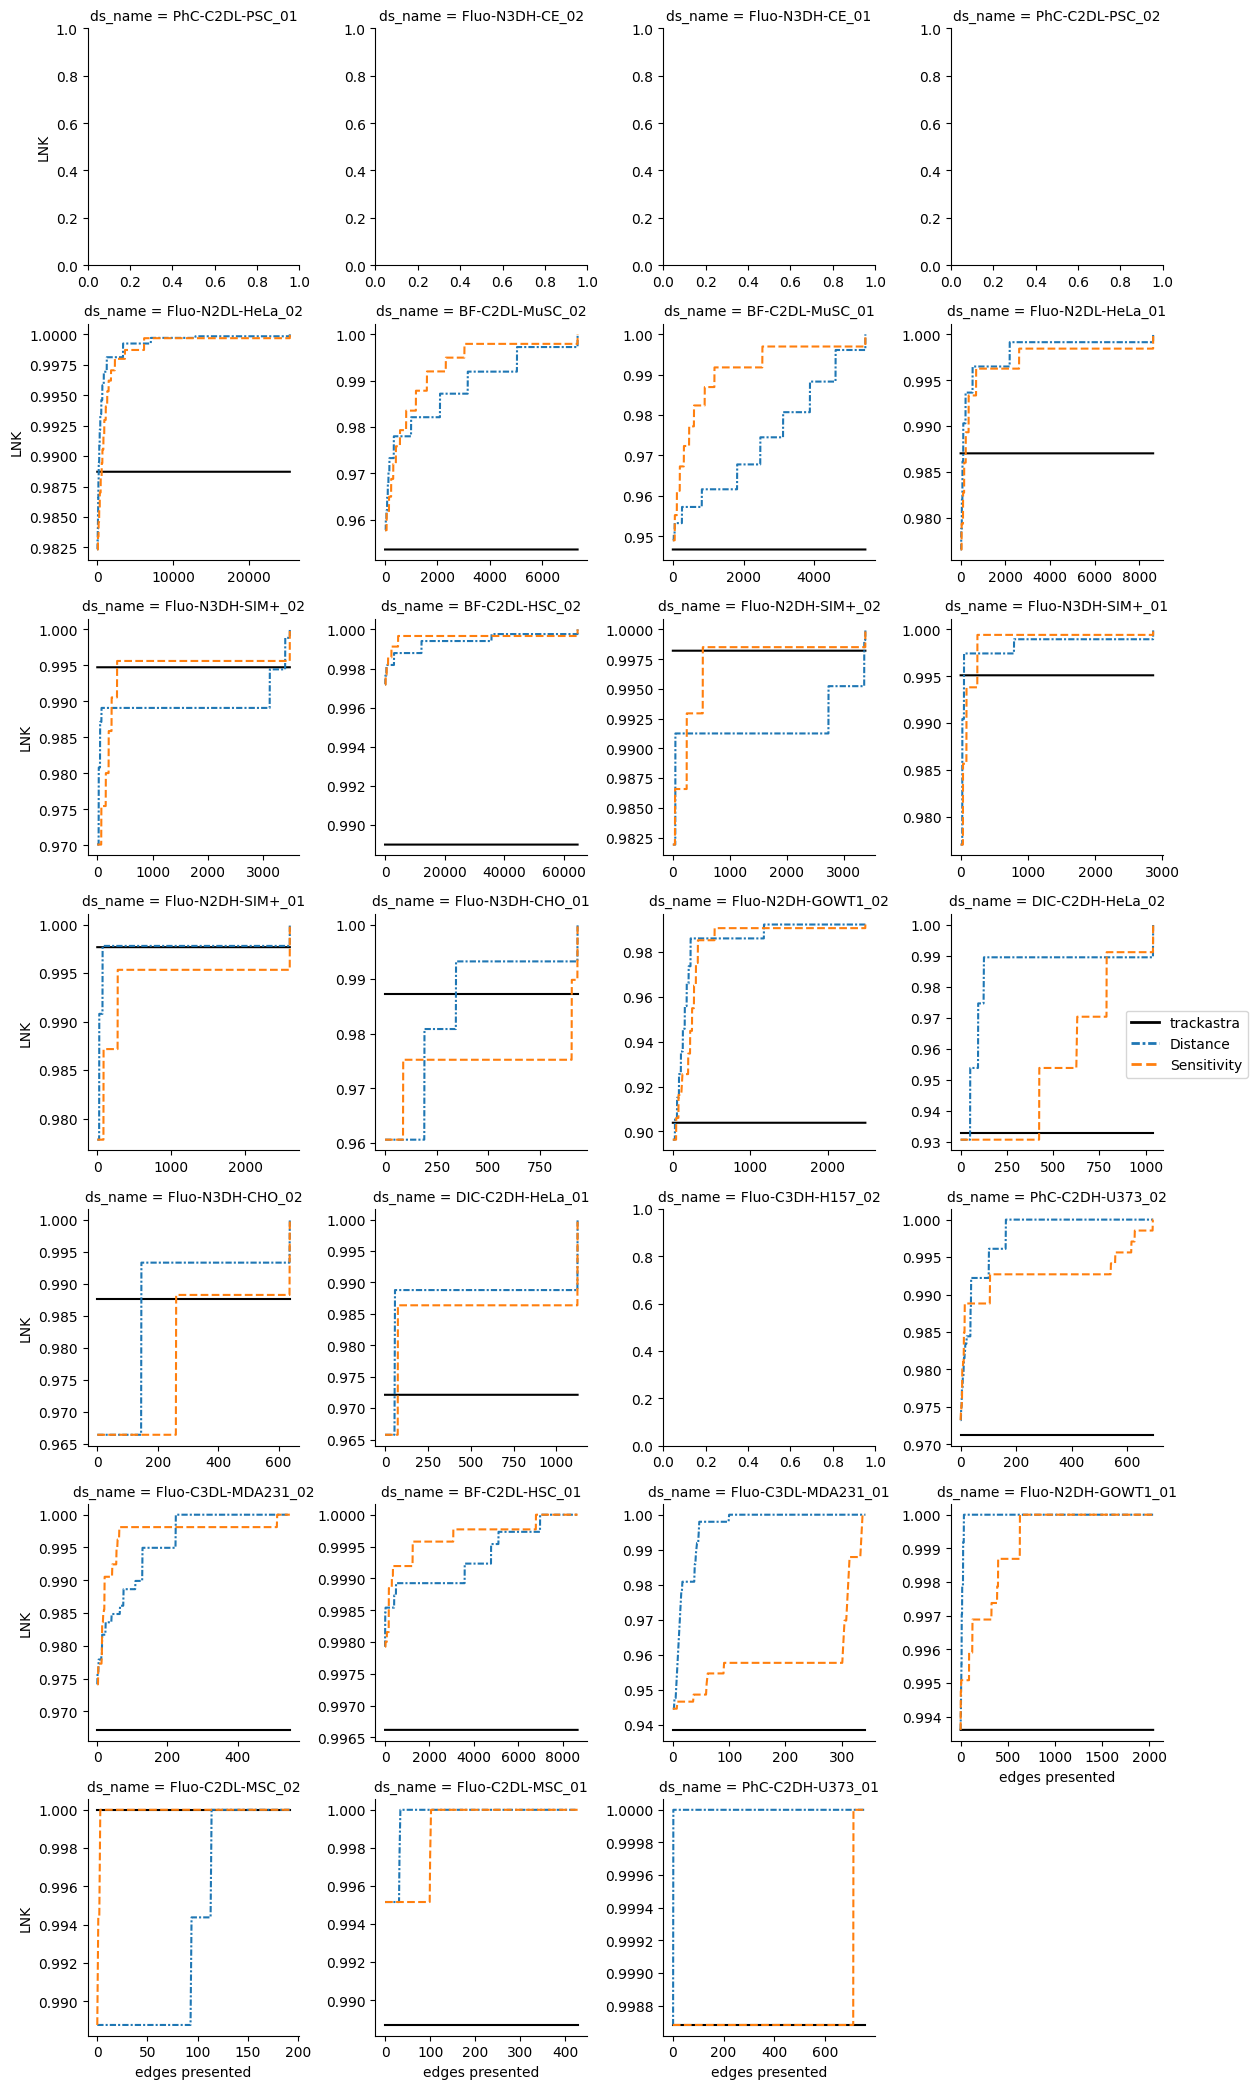

In [17]:
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns

grid = sns.FacetGrid(all_df, col='ds_name', col_wrap=4, sharex=False, sharey=False, col_order=plot_order)
grid.map_dataframe(sns.lineplot, x='feature_distance_presented_rank', y='trackastra_LNK', color='black')
grid.map_dataframe(sns.lineplot, x='feature_distance_presented_rank', y='feature_distance_LNK', color=sns.color_palette()[0], linestyle=(0, (3, 1, 1, 1)))
grid.map_dataframe(sns.lineplot, x='sensitivity_diff_presented_rank', y='sensitivity_diff_LNK', color=sns.color_palette()[1], linestyle='--')


# Create custom legend labels
custom_lines = [
    Line2D([0], [0], color='black', lw=2),
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, linestyle=(0, (3, 1, 1, 1))),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, linestyle='--'),
]

# Add legend to the figure
grid.figure.legend(custom_lines, ['trackastra', 'Distance', 'Sensitivity'], loc='center right', bbox_to_anchor=(1.05, 0.5))
grid.set_xlabels('edges presented')
grid.set_ylabels('LNK')

In [17]:
all_df.groupby('ds_name').agg({'feature_distance_LNK': 'max', 'sensitivity_diff_LNK': 'max'})

,feature_distance_LNK,sensitivity_diff_LNK
ds_name,,
BF-C2DL-HSC_01,1.000000,1.000000
BF-C2DL-HSC_02,1.000000,1.000000
BF-C2DL-MuSC_01,1.000000,1.000000
BF-C2DL-MuSC_02,1.000000,1.000000
DIC-C2DH-HeLa_01,1.000000,1.000000
DIC-C2DH-HeLa_02,1.000000,1.000000
Fluo-C2DL-MSC_01,1.000000,1.000000
Fluo-C2DL-MSC_02,1.000000,1.000000
Fluo-C3DL-MDA231_01,1.000000,1.000000


In [32]:
def find_first_valid_value(group):
    condition = group['feature_distance_LNK'] >= group['trackastra_LNK']
    first_valid_row = group.loc[condition].iloc[0]
    return pd.Series({
        'distance_n_edges': first_valid_row['feature_distance_presented_rank'],
        'sensitivity_n_edges': first_valid_row['sensitivity_diff_presented_rank']
    })

result = all_df.groupby('ds_name').apply(find_first_valid_value).reset_index()
result['distance_prop'] = result.apply(lambda row: row['distance_n_edges'] / all_df[all_df['ds_name'] == row['ds_name']].shape[0], axis=1)
result['sensitivity_prop'] = result.apply(lambda row: row['sensitivity_n_edges'] / all_df[all_df['ds_name'] == row['ds_name']].shape[0], axis=1)
result['min_edges'] = result[['distance_n_edges', 'sensitivity_n_edges']].min(axis=1)
result['min_prop'] = result[['distance_prop', 'sensitivity_prop']].min(axis=1)

result.sort_values(by='min_prop')

/tmp/ipykernel_2795906/3858752203.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = all_df.groupby('ds_name').apply(find_first_valid_value).reset_index()


,ds_name,distance_n_edges,sensitivity_n_edges,distance_prop,sensitivity_prop,min_edges,min_prop
0,BF-C2DL-HSC_01,0,0,0.000000,0.000000,0,0.000000
1,BF-C2DL-HSC_02,0,0,0.000000,0.000000,0,0.000000
2,BF-C2DL-MuSC_01,0,0,0.000000,0.000000,0,0.000000
3,BF-C2DL-MuSC_02,0,0,0.000000,0.000000,0,0.000000
6,Fluo-C2DL-MSC_01,0,0,0.000000,0.000000,0,0.000000
10,Fluo-N2DH-GOWT1_01,0,0,0.000000,0.000000,0,0.000000
9,Fluo-C3DL-MDA231_02,0,0,0.000000,0.000000,0,0.000000
8,Fluo-C3DL-MDA231_01,0,0,0.000000,0.000000,0,0.000000
20,PhC-C2DH-U373_01,0,0,0.000000,0.000000,0,0.000000
21,PhC-C2DH-U373_02,0,0,0.000000,0.000000,0,0.000000


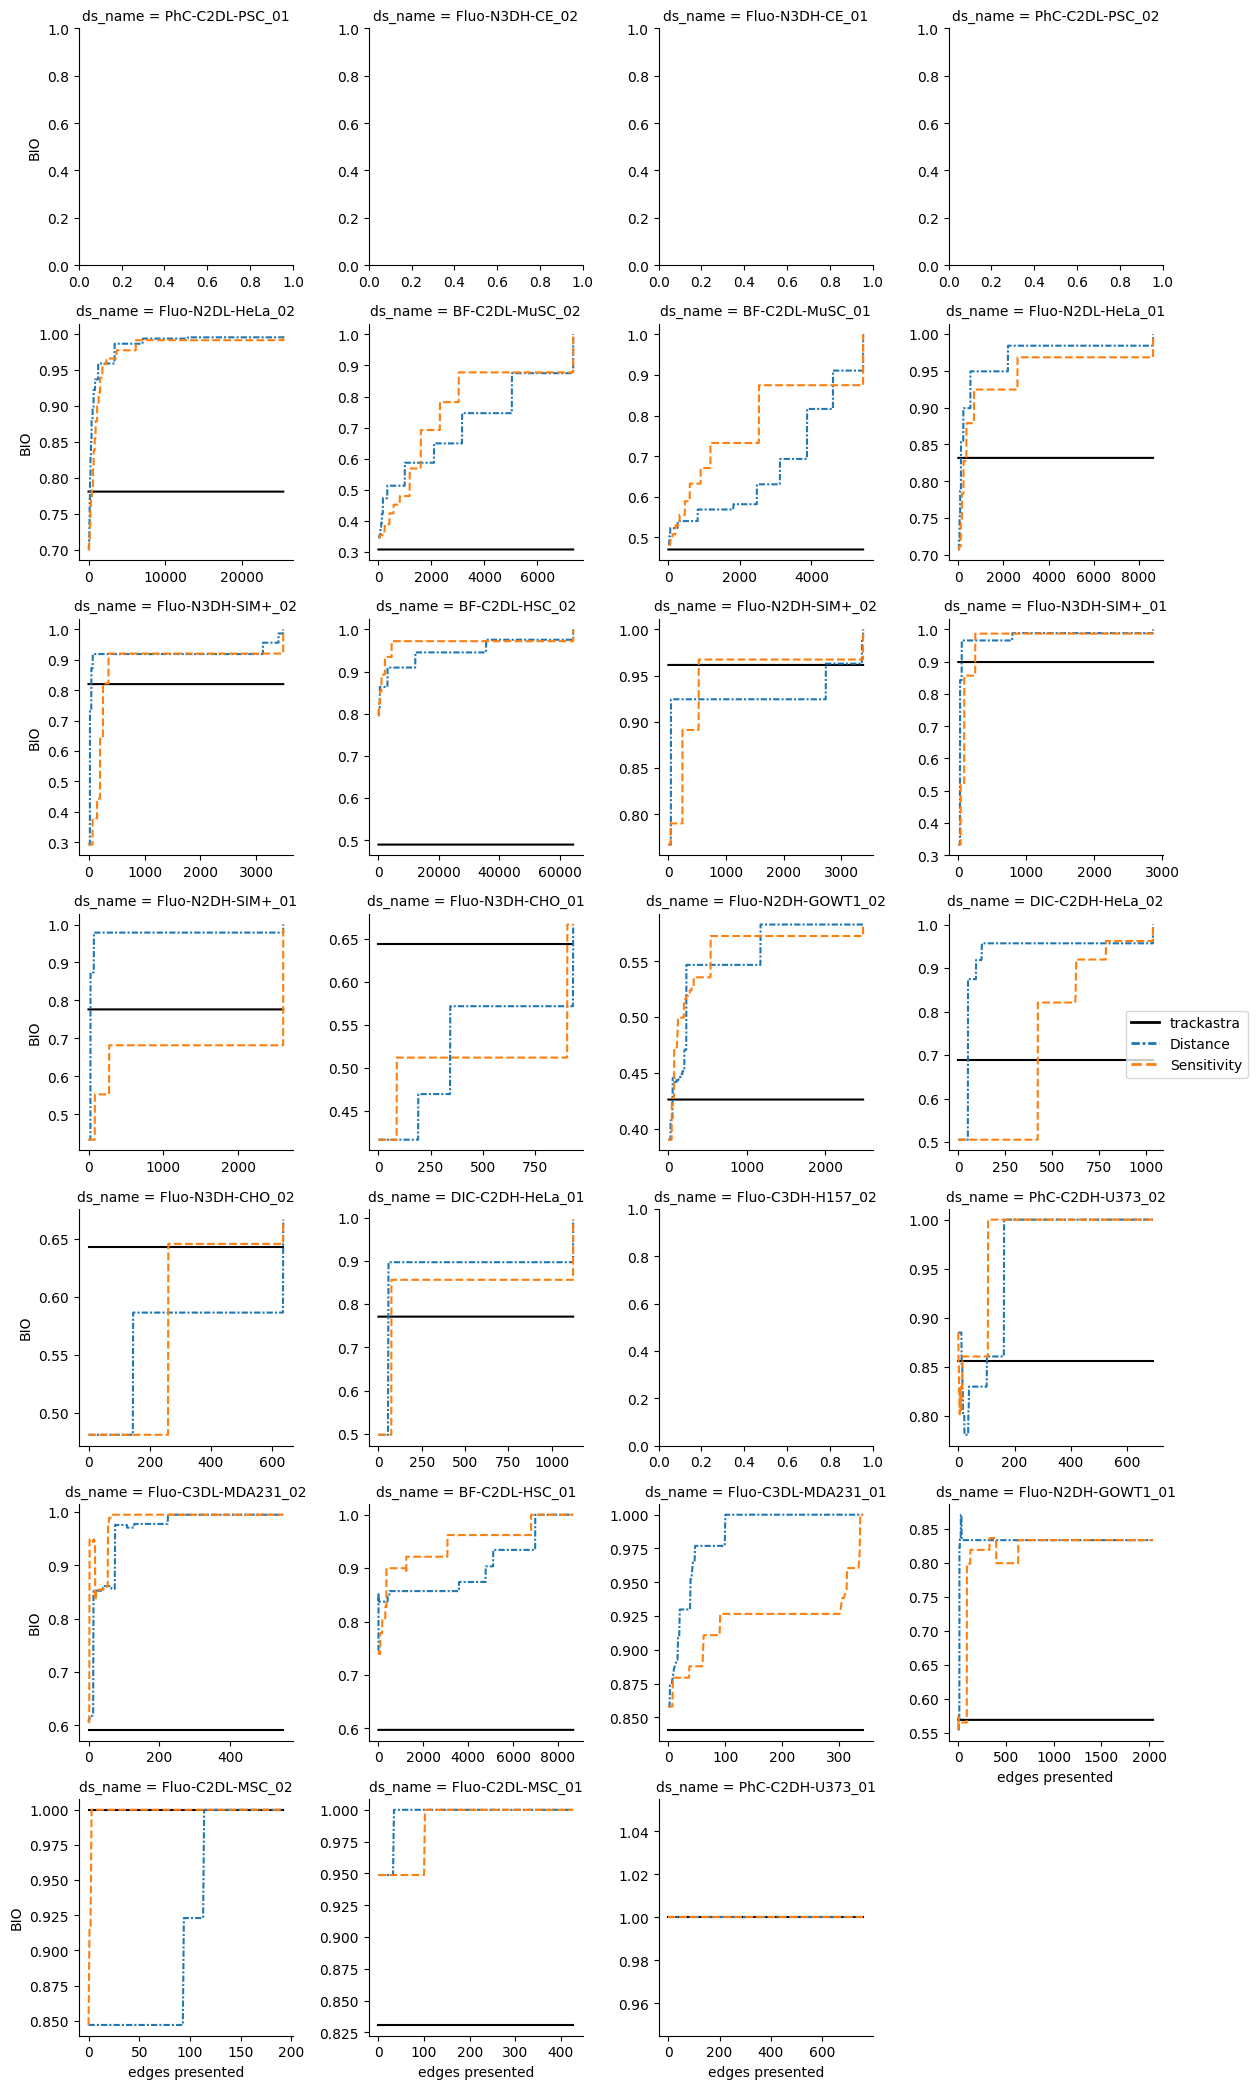

In [18]:
import seaborn as sns

grid = sns.FacetGrid(all_df, col='ds_name', col_wrap=4, sharex=False, sharey=False, col_order=plot_order)
grid.map_dataframe(sns.lineplot, x='feature_distance_presented_rank', y='trackastra_BIO(0)', color='black')
grid.map_dataframe(sns.lineplot, x='feature_distance_presented_rank', y='feature_distance_BIO(0)', color=sns.color_palette()[0], linestyle=(0, (3, 1, 1, 1)))
grid.map_dataframe(sns.lineplot, x='sensitivity_diff_presented_rank', y='sensitivity_diff_BIO(0)', color=sns.color_palette()[1], linestyle=('--'))


# Create custom legend labels
custom_lines = [
    Line2D([0], [0], color='black', lw=2),
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, linestyle=(0, (3, 1, 1, 1))),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, linestyle='--'),
]

# Add legend to the figure
grid.figure.legend(custom_lines, ['trackastra', 'Distance', 'Sensitivity'], loc='center right', bbox_to_anchor=(1.05, 0.5))
grid.set_xlabels('edges presented')
grid.set_ylabels('BIO')

In [ ]:
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns

grid = sns.FacetGrid(all_df, col='ds_name', col_wrap=4, sharex=False, sharey=False, col_order=plot_order)
grid.map_dataframe(sns.lineplot, x='distance_edges_presented', y='trackastra_LNK', color='black')

grid.map_dataframe(sns.lineplot, x='distance_ws_edges_presented', y='distance_ws_LNK', color=sns.color_palette()[0], linestyle=(0, (3, 1, 1, 1)))
grid.map_dataframe(sns.lineplot, x='sensitivity_diff_ws_edges_presented', y='sensitivity_diff_ws_LNK', color=sns.color_palette()[1], linestyle='--')


# Create custom legend labels
custom_lines = [
    Line2D([0], [0], color='black', lw=2),
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, linestyle=(0, (3, 1, 1, 1))),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, linestyle='--'),
]

# Add legend to the figure
grid.figure.legend(custom_lines, ['trackastra', 'Distance', 'Sensitivity'], loc='center right', bbox_to_anchor=(1.05, 0.5))
grid.set_xlabels('edges presented')
grid.set_ylabels('LNK')

In [ ]:
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns

grid = sns.FacetGrid(all_df, col='ds_name', col_wrap=4, sharex=False, sharey=False, col_order=plot_order)
grid.map_dataframe(sns.lineplot, x='distance_edges_presented', y='trackastra_BIO(0)', color='black')

grid.map_dataframe(sns.lineplot, x='distance_ws_edges_presented', y='distance_ws_BIO(0)', color=sns.color_palette()[0], linestyle=(0, (3, 1, 1, 1)))
grid.map_dataframe(sns.lineplot, x='sensitivity_diff_ws_edges_presented', y='sensitivity_diff_ws_BIO(0)', color=sns.color_palette()[1], linestyle='--')


# Create custom legend labels
custom_lines = [
    Line2D([0], [0], color='black', lw=2),
    Line2D([0], [0], color=sns.color_palette()[0], lw=2, linestyle=(0, (3, 1, 1, 1))),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2, linestyle='--'),
]

# Add legend to the figure
grid.figure.legend(custom_lines, ['trackastra', 'Distance', 'Sensitivity'], loc='center right', bbox_to_anchor=(1.05, 0.5))
grid.set_xlabels('edges presented')
grid.set_ylabels('BIO')